In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import skewnorm

In [ ]:
pip install seaborn

In [ ]:
pip install plotly

In [ ]:
pip install scipy

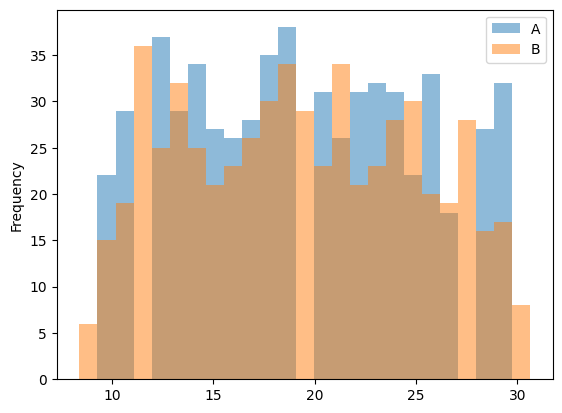

,A,B
0,12,12.323412
1,24,23.255645
2,19,19.402303
3,27,26.342426
4,26,27.815204
...,...,...
583,21,21.465912
584,20,18.891302
585,11,13.090116
586,16,16.584436


In [58]:
np.random.seed(1401)
df = pd.DataFrame(data={"A": np.random.randint(10, 30, 588)})
df ["B"] = df["A"] + np.random.randn(588)
graph= df.plot.hist(bins=25, alpha = 0.5)
plt.show()
df

In [59]:
df.max()

A    29.00000
B    30.64259
dtype: float64

In [60]:
df1 = pd.DataFrame(data={"Price": [45.34, 86.90, 160],
                         "Market visits": 4,
                         "color": "Black"})
df1

,Price,Market visits,color
0,45.34,4,Black
1,86.90,4,Black
2,160.00,4,Black


---

### Central Tendancy

In [9]:
np.random.seed(1723)

size = 1000

x1 = np.random.normal(loc=40, scale = 2, size= int(size/2))
x2 = np.random.normal(loc= 69, scale= 2, size=int(size/2))

bi_modal = np.concatenate([x1, x2])

x1 = np.random.normal(loc=40, scale=4, size=int(size/4))
x2 = np.random.normal(loc= 69, scale=4, size=int(size/4))
x3 = np.random.normal(loc=0, scale=2, size=int(size/4))
x4 = np.random.normal(loc=80, scale=2, size=int(size/4))

multi_modal= np.concatenate([x1, x2, x3, x4])

df = pd.DataFrame(data={
    "Normal": np.random.normal(loc=0, scale=2, size= size),
    "Positive skewed": skewnorm.rvs(a=10, size=size),
    "Negative skewed": skewnorm.rvs(a=-10, size=size),
    "Exponential": np.random.exponential(scale=20, size=size),
    "Uniform": np.random.uniform(low=0.0, high=1.0, size=size),
    "Bimodal": bi_modal,
    "Multimodal": multi_modal,
    "Poisson": np.random.poisson(lam=1.0, size=size),
    "Discrete": np.random.choice([10, 12, 14, 16, 17, 20, 69], size=size)
}).round(3)

df.head()

,Normal,Positive skewed,Negative skewed,Exponential,Uniform,Bimodal,Multimodal,Poisson,Discrete
0,1.419,1.916,-0.695,5.408,0.577,38.470,45.757,1,20
1,4.642,0.673,-0.962,34.975,0.871,41.359,35.302,1,69
2,3.786,0.412,-0.513,38.579,0.273,43.482,33.001,0,69
3,-0.326,0.079,-0.156,1.803,0.359,40.184,36.594,2,10
4,-0.412,0.184,-0.896,12.482,0.392,38.106,40.149,0,12


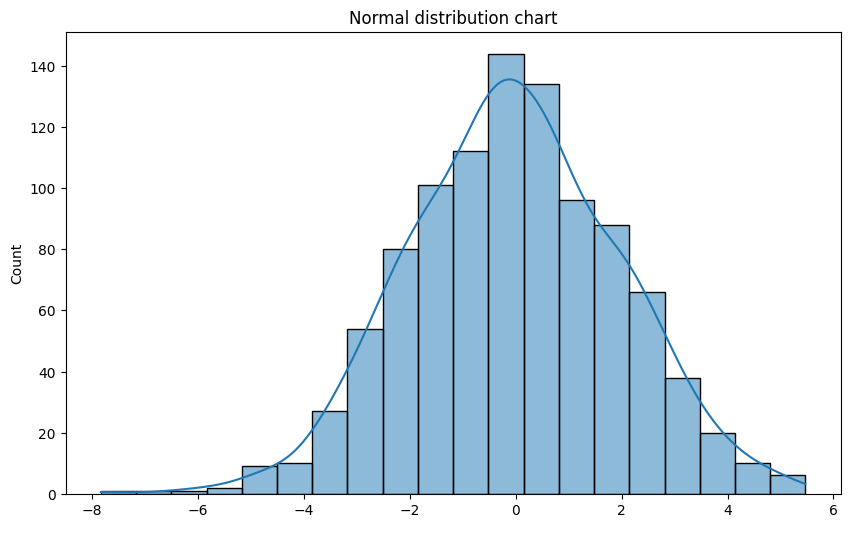

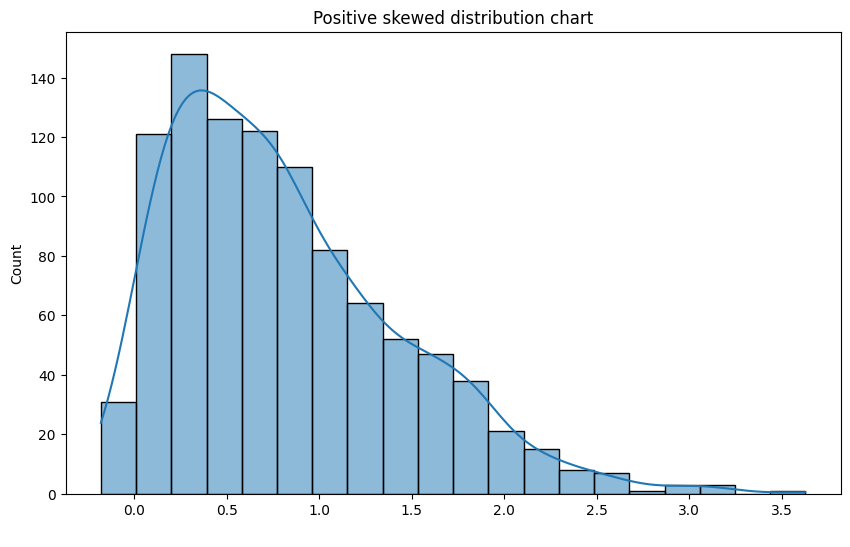

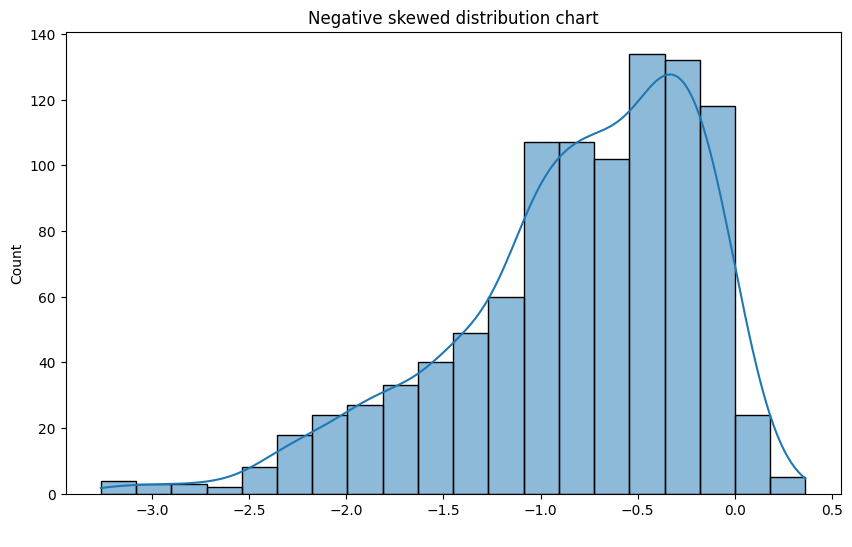

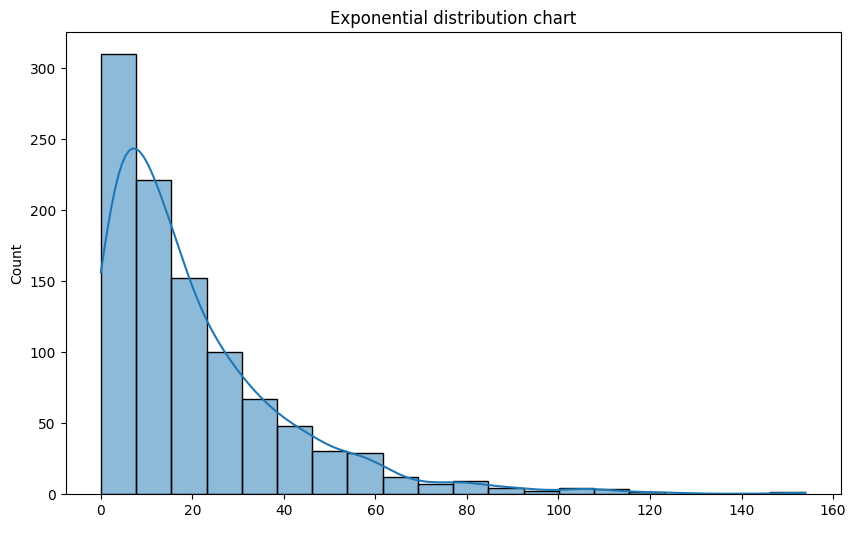

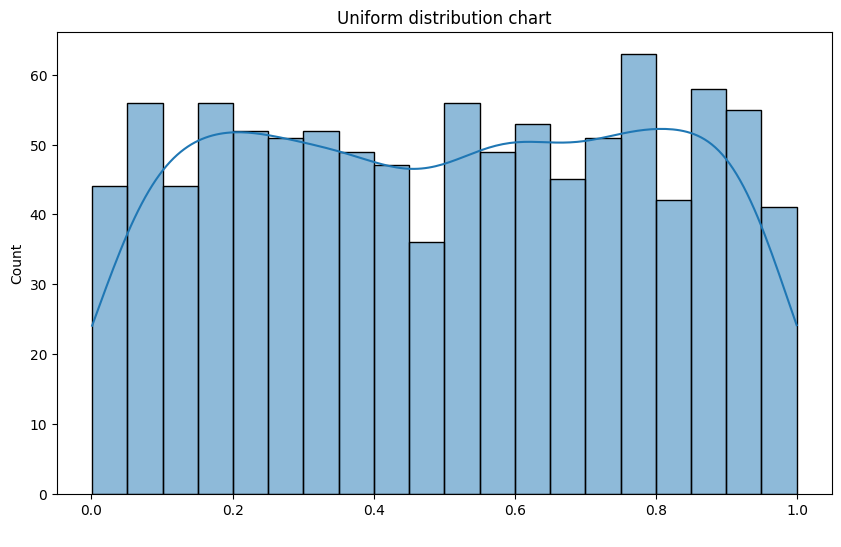

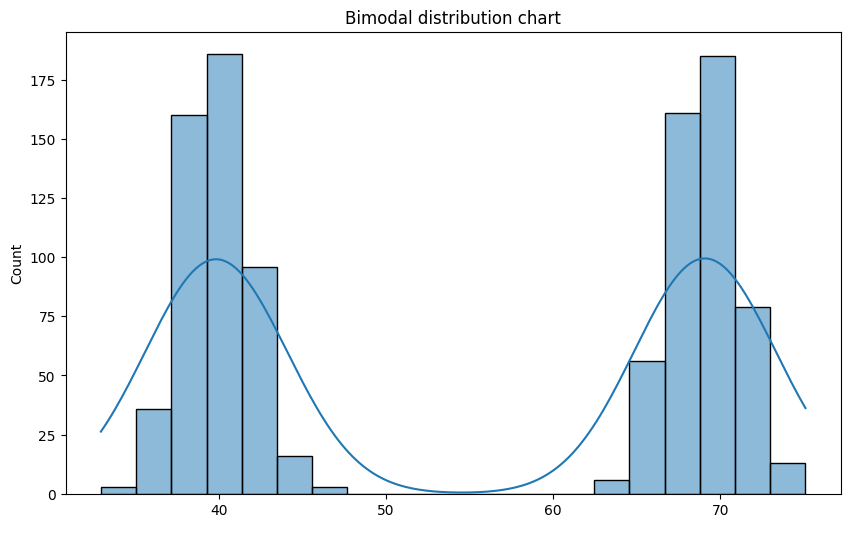

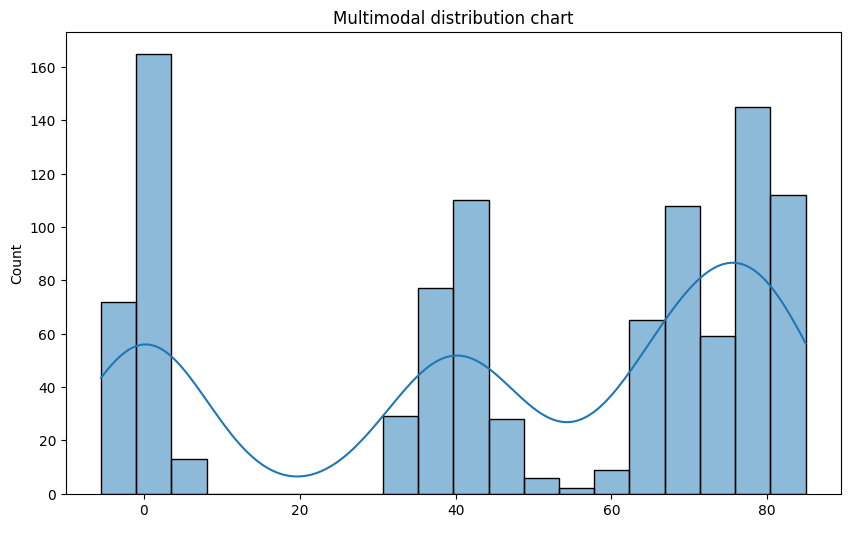

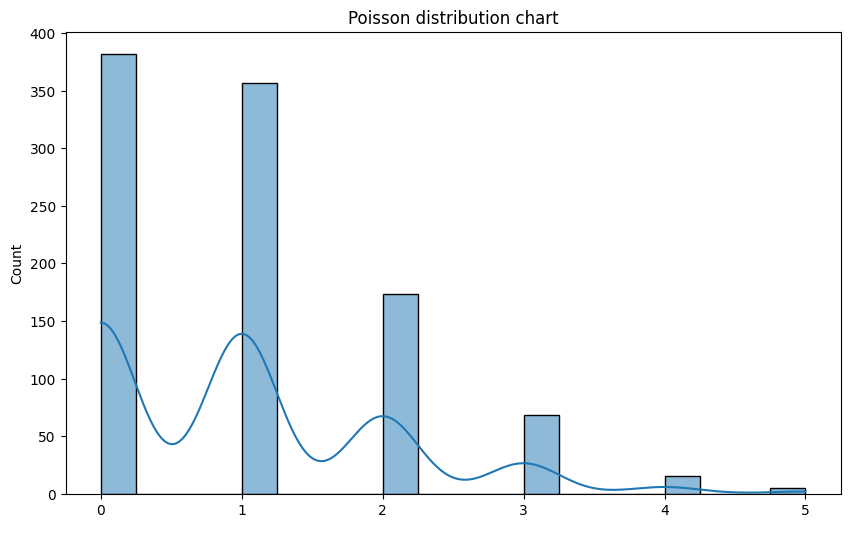

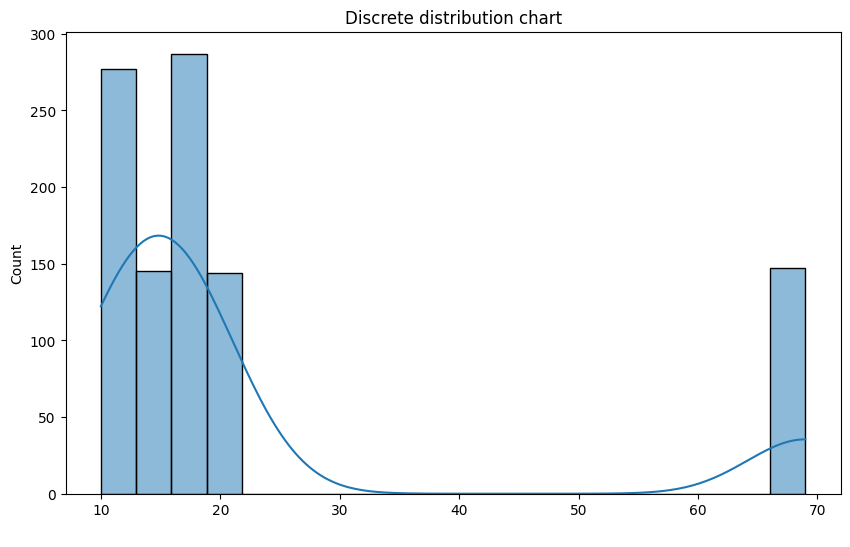

In [14]:
for col in df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x= col, bins=20, kde=True)
    plt.title(f"{col} distribution chart")
    plt.xlabel(" ")
    plt.show()
    print("\n\n")


In [12]:
df.mean()

Normal             -0.046782
Positive skewed     0.814570
Negative skewed    -0.815944
Exponential        20.134039
Uniform             0.502042
Bimodal            54.469718
Multimodal         47.312408
Poisson             0.992000
Discrete           22.829000
dtype: float64

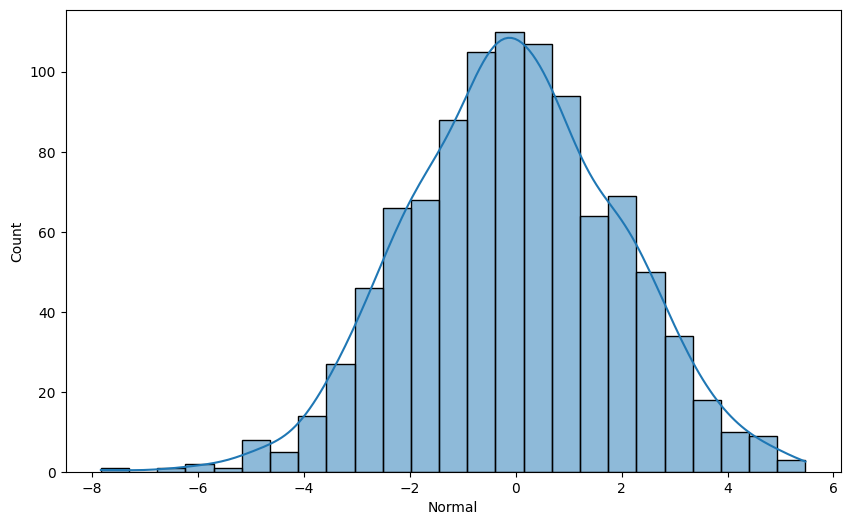

In [16]:
col = "Normal"
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=col, kde=True)
plt.show()

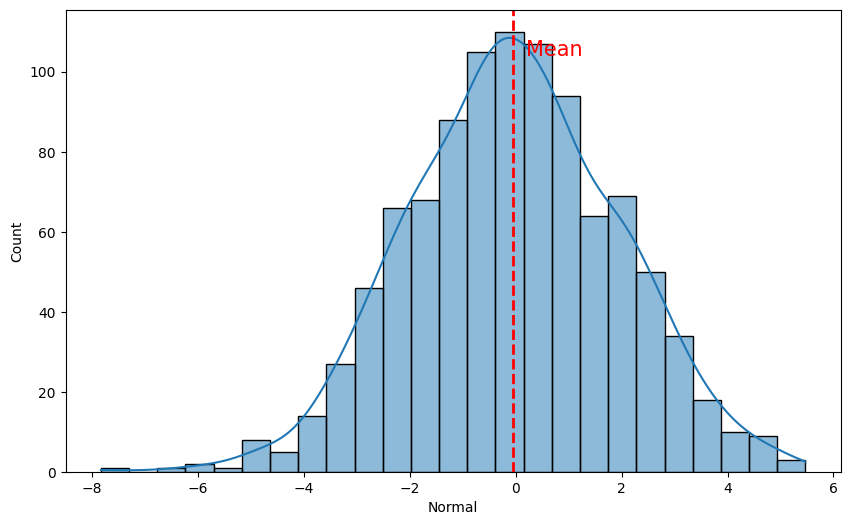

In [21]:
fig, axes = plt.subplots(figsize=(10, 6))
sns.histplot(data= df, x= col, kde=True)
plt.axvline(df[col].mean(), color="r", linestyle= "--", linewidth= 2)
plt.text(x=df[col].mean() + df[col].std()/8, y= axes.get_ylim()[1]*0.90, s="Mean",
         fontsize=15, c="r")
plt.show()

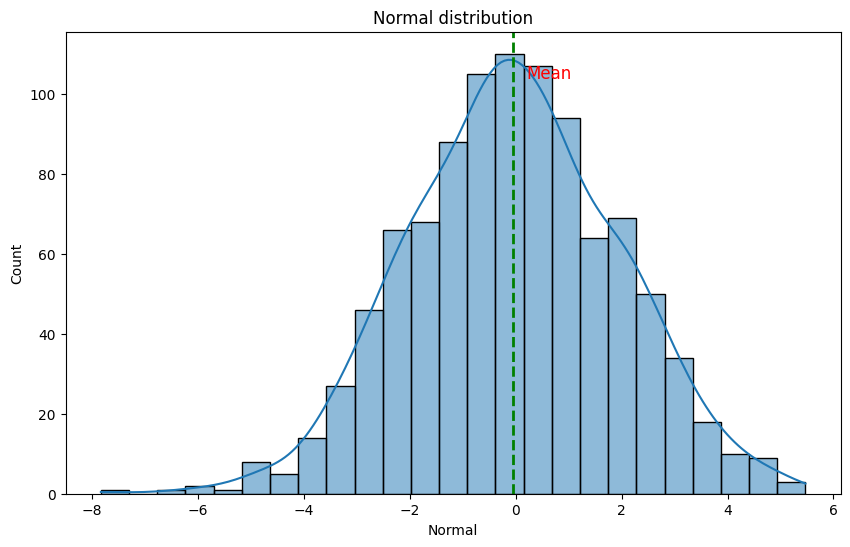

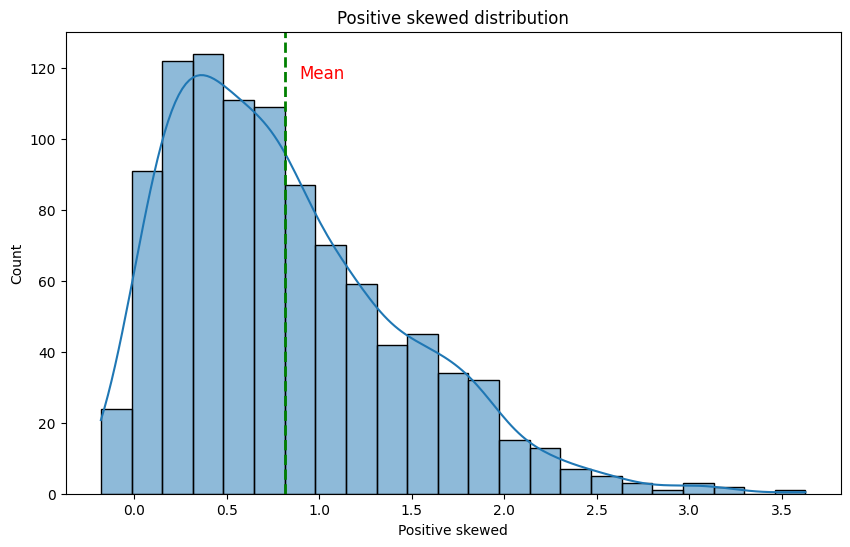

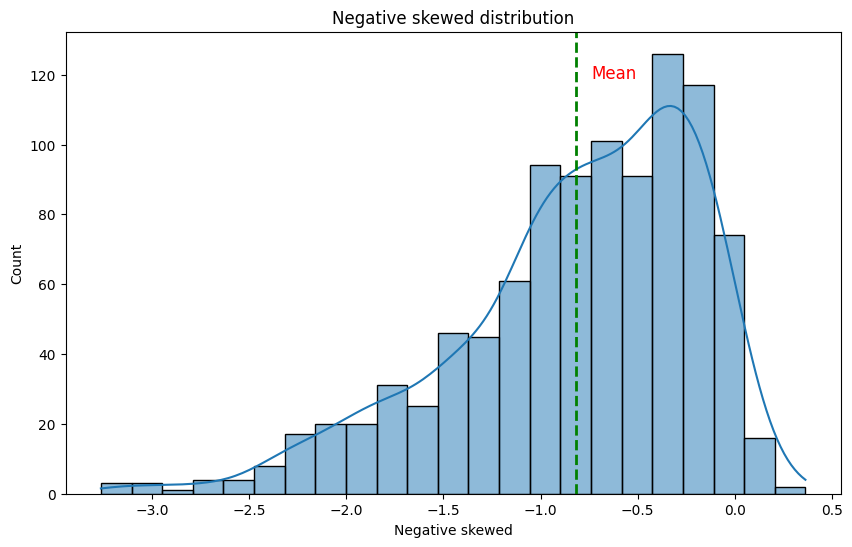

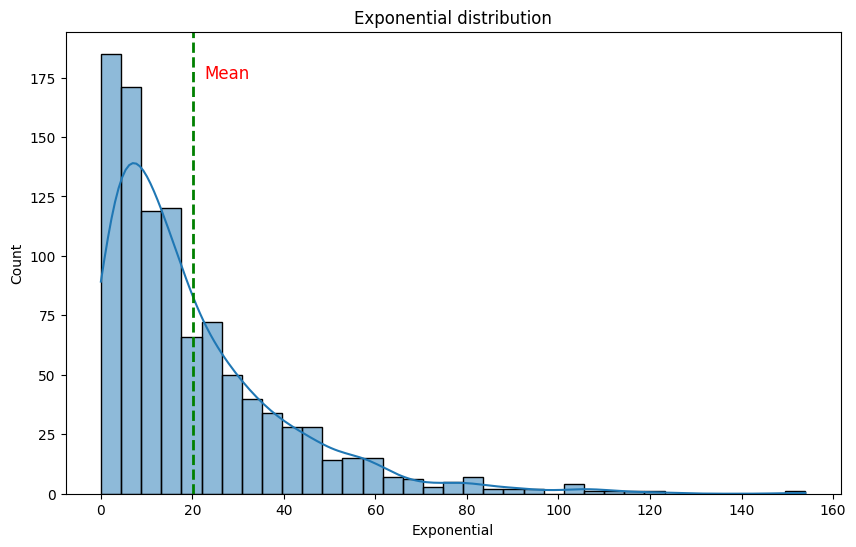

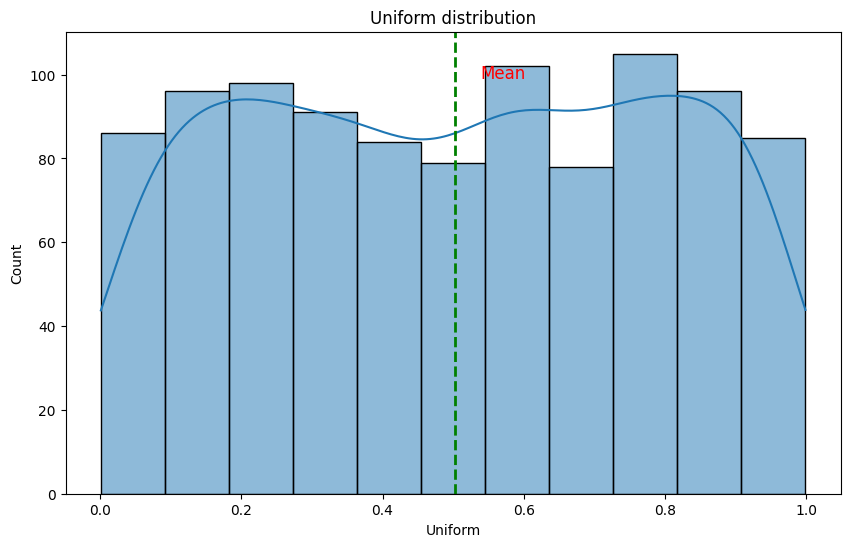

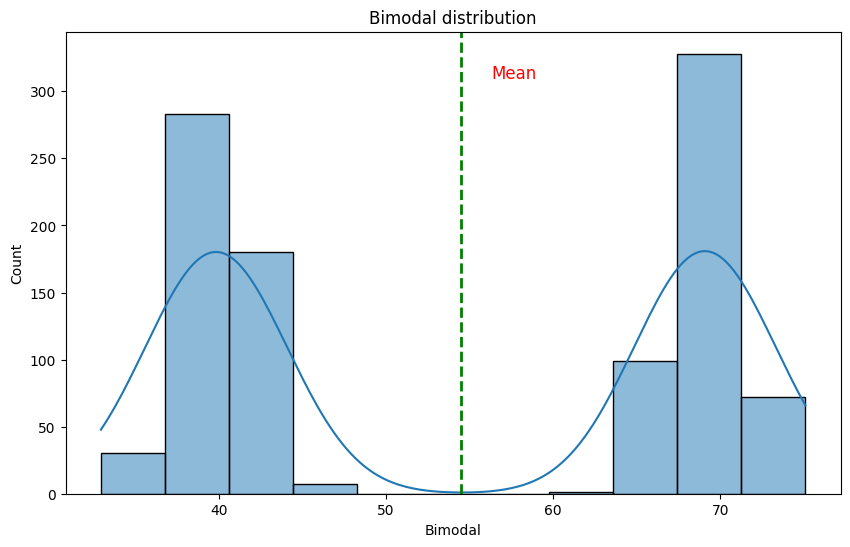

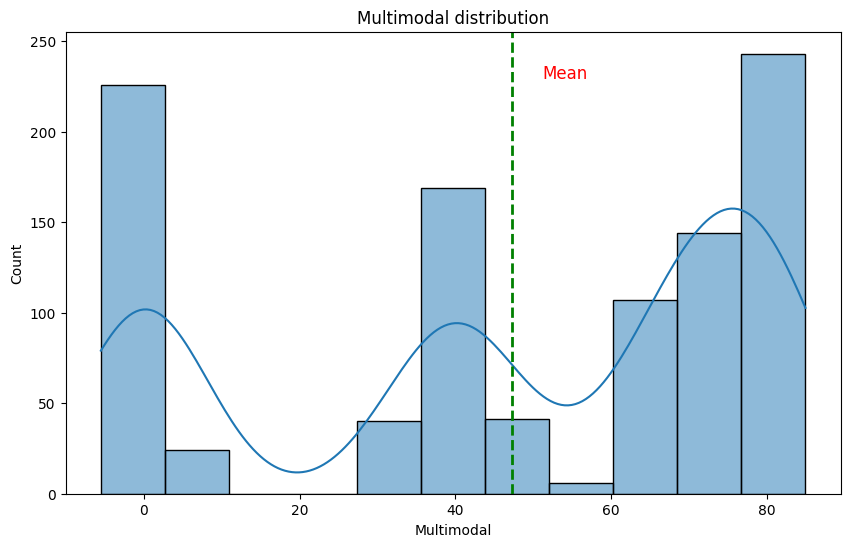

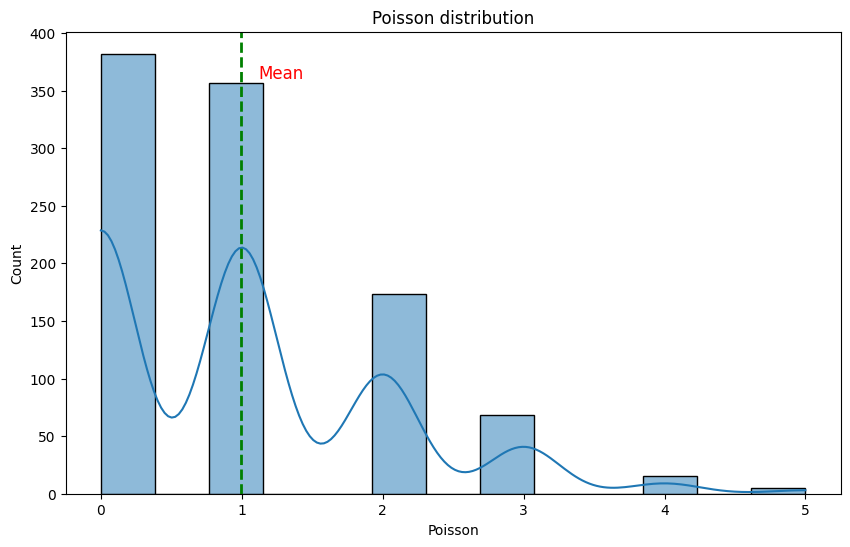

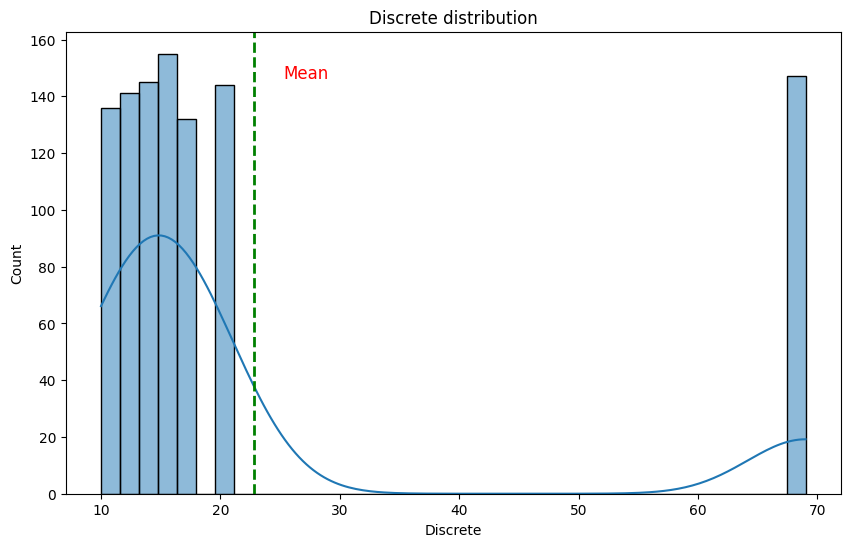

In [24]:
for col in df.columns:
    fig, axes= plt.subplots(figsize=(10,6))
    plt.title(f"{col} distribution")
    sns.histplot(data=df, x=col, kde=True)
    plt.axvline(df[col].mean(), color="g", linestyle="--", linewidth=2 )
    plt.text(df[col].mean() + df[col].std()/8, s="Mean", y=axes.get_ylim()[1]*0.90,
             fontsize=12, color="r")
    plt.show()
    print("\n\n")
    
    
    

---

In [25]:
df.median()

Normal             -0.0850
Positive skewed     0.6935
Negative skewed    -0.7015
Exponential        13.9540
Uniform             0.5105
Bimodal            54.6570
Multimodal         53.4210
Poisson             1.0000
Discrete           16.0000
dtype: float64

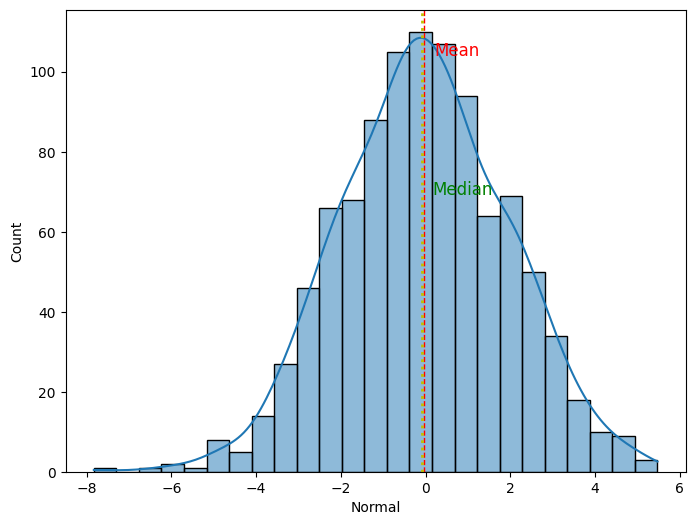

In [35]:
col = "Normal"
fig, axes = plt.subplots(figsize=(8, 6))

sns.histplot(data=df, x=col, kde=True)
plt.axvline(df[col].mean(), color="r", linestyle="--", linewidth=1)
plt.text(df[col].mean() + df[col].std()/8, y= axes.get_ylim()[1] *0.90,  s="Mean", 
         fontsize=12, color="r")
plt.axvline(df[col].median(), color="y", linestyle=":", linewidth=2)
plt.text(df[col].median() + df[col].std()/8, y=axes.get_ylim()[1] * 0.60, s="Median",
         fontsize=12,color="g")

plt.show()
print("\n")


---

In [30]:
df.mode()

,Normal,Positive skewed,Negative skewed,Exponential,Uniform,Bimodal,Multimodal,Poisson,Discrete
0,-1.770,0.085,-0.361,3.969,0.222,69.659,-1.301,0.0,16.0
1,-0.218,NaN,NaN,4.770,0.598,NaN,-0.640,NaN,NaN
2,0.256,NaN,NaN,7.826,NaN,NaN,37.426,NaN,NaN
3,NaN,NaN,NaN,8.342,NaN,NaN,40.149,NaN,NaN
4,NaN,NaN,NaN,8.631,NaN,NaN,40.342,NaN,NaN
5,NaN,NaN,NaN,9.732,NaN,NaN,69.228,NaN,NaN
6,NaN,NaN,NaN,11.571,NaN,NaN,75.354,NaN,NaN
7,NaN,NaN,NaN,12.575,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,13.608,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,17.496,NaN,NaN,NaN,NaN,NaN


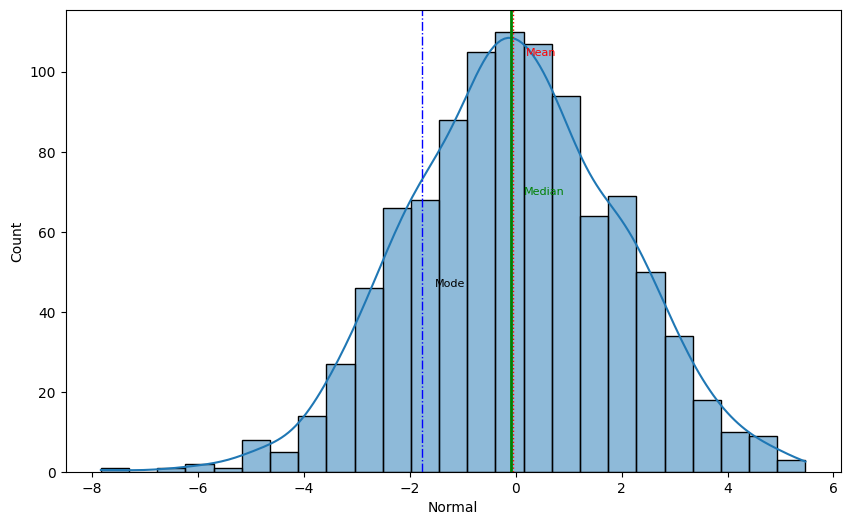

In [41]:
col = "Normal"

fig, axes = plt.subplots(figsize= (10, 6))

sns.histplot(df, x=col, kde=True)

plt.axvline(df[col].mean(), color="r", linestyle=":", linewidth=1)
plt.text(df[col].mean() + df[col].std()/8, s="Mean", fontsize=8, 
         y=axes.get_ylim()[1]*0.90, color="r")

plt.axvline(df[col].median(), color="g", linestyle="-", linewidth=2)
plt.text(df[col].median() + df[col].std()/8, s="Median", fontsize=8,
         color="g", y=axes.get_ylim()[1]*0.60)

plt.axvline(df[col].mode()[0], linestyle="-.", linewidth= 1, color="blue")
plt.text(df[col].mode()[0] + df[col].std()/8, fontsize= 8, s="Mode",
         y=axes.get_ylim()[1]*0.40)

plt.show()

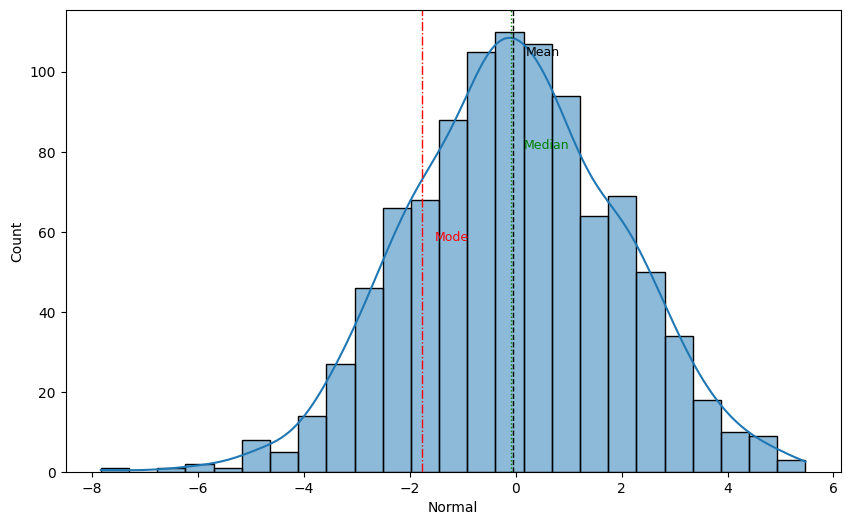

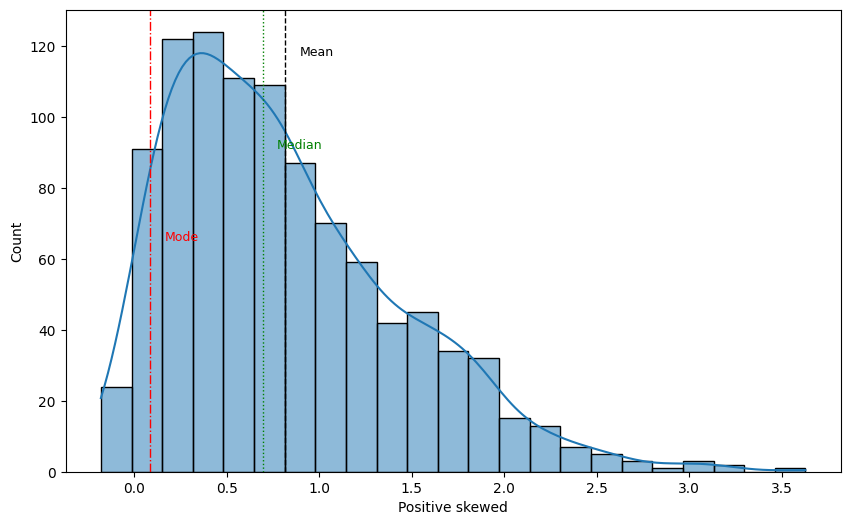

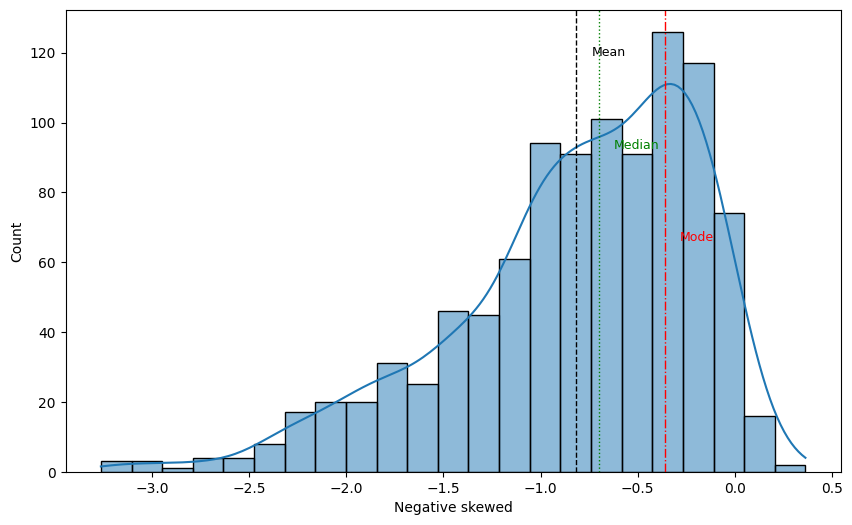

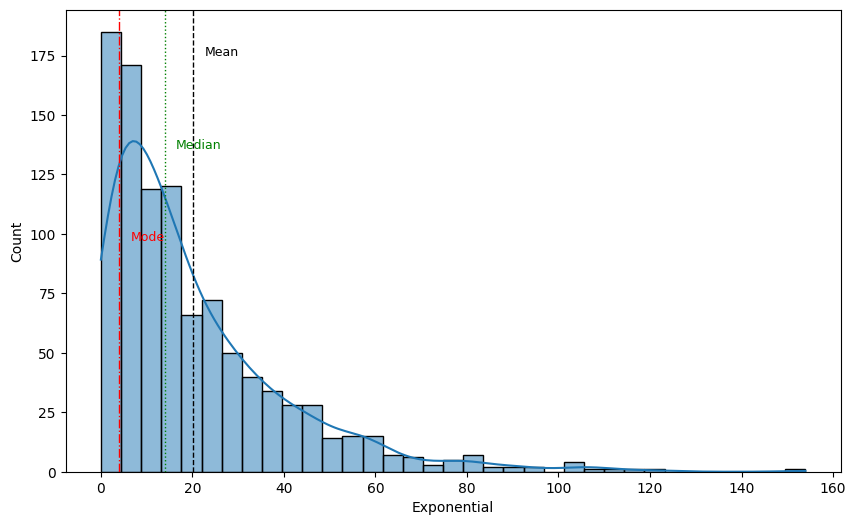

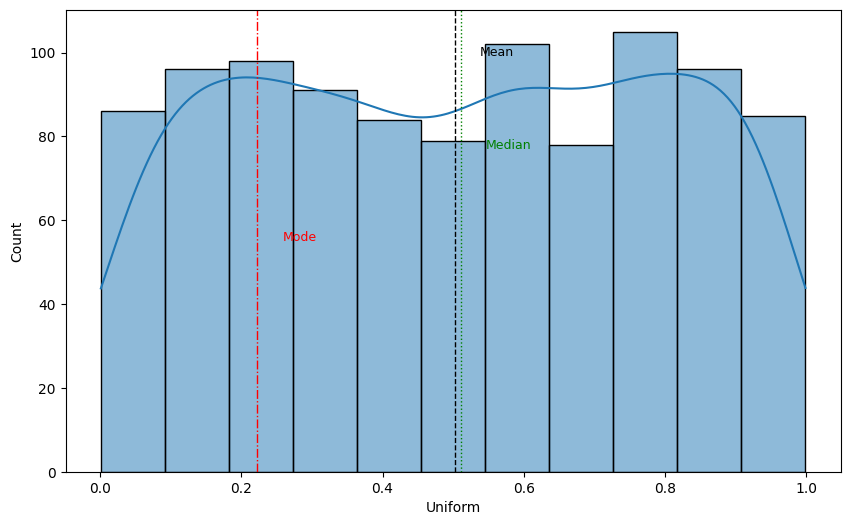

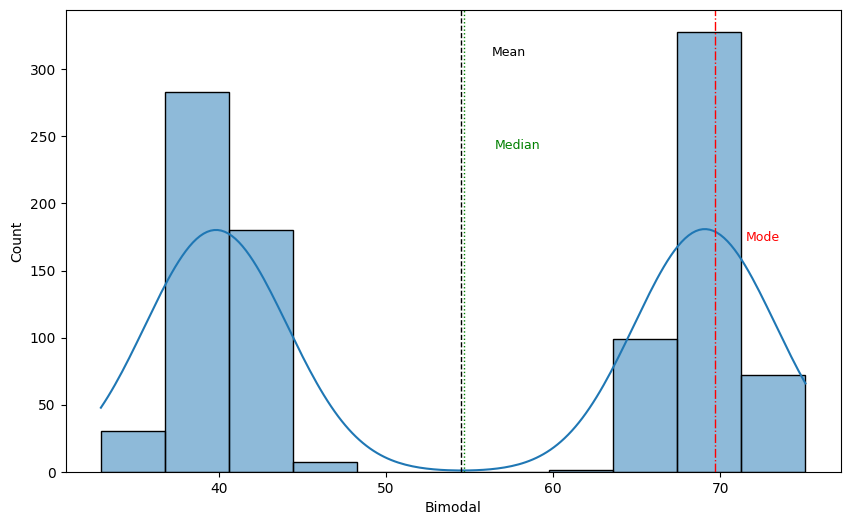

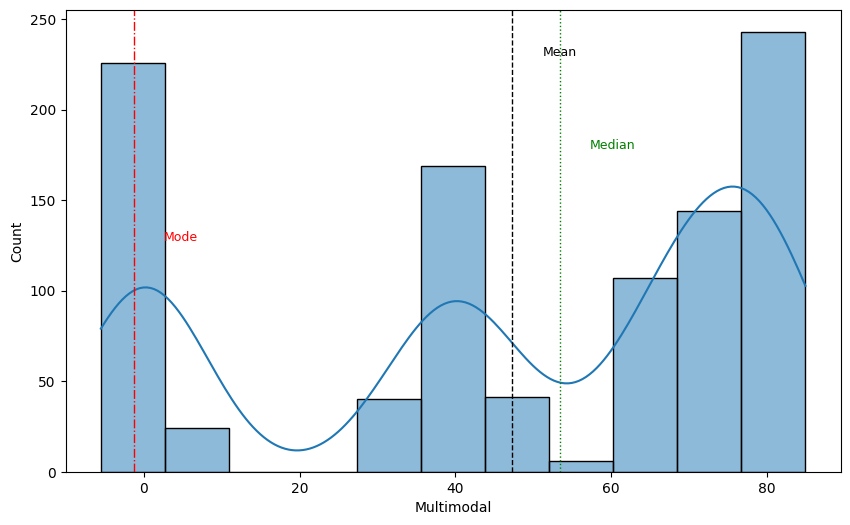

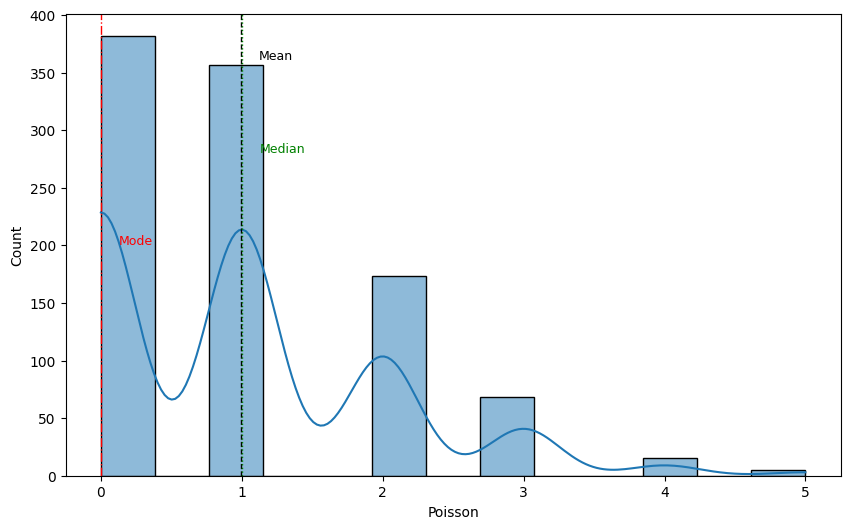

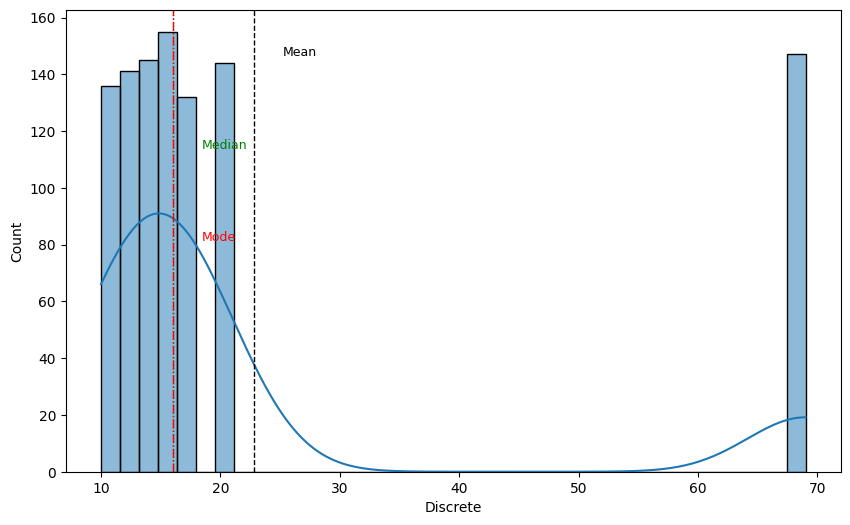

In [46]:
for col in df.columns:
    fig, axes=plt.subplots(figsize=(10,6))
    sns.histplot(data=df, x= col, kde=True)

    plt.axvline(df[col].mean(), linestyle="--", linewidth= 1, color="k")
    plt.text(df[col].mean() + df[col].std()/8, y=axes.get_ylim()[1] * 0.90, 
             s="Mean", fontsize=9, color="k")

    plt.axvline(df[col].median(), linestyle=":", linewidth=1, color="g")
    plt.text(df[col].median() + df[col].std()/8, s="Median", y=axes.get_ylim()[1]*0.70,
             fontsize=9, color="g")
    
    plt.axvline(df[col].mode()[0], linestyle="-.", linewidth=1, color="r")
    plt.text(df[col].mode()[0] + df[col].std()/8, y=axes.get_ylim()[1]* 0.50, s="Mode",
             fontsize=9, color="r")



    plt.show()